# Aprendizaje no supervisado

In [122]:
import numpy as np
import matplotlib.pyplot as plt

#   1.

In [123]:
sigma = np.array([[2,1,1,1],
                  [1,2,1,1],
                  [1,1,2,1],
                  [1,1,1,2]])

def P_x(x, sigma):
    det = 1/(np.sqrt(np.linalg.det(sigma)) * (2*np.pi)**2)
    inv = np.linalg.inv(sigma)
    exp = np.exp(-0.5 * np.dot(np.dot(x, inv), x))
    return det * exp

def learn(W, sigma, lr = 0.001):
    #tomar un x de P_X
    x = np.random.multivariate_normal([0,0,0,0], sigma)
    #calcular la salida de la red
    V = np.dot(W, x)
    delta_W = lr * V * (x - V * W)
    W += delta_W
    return W


In [124]:
x_1 = []
x_2 = []
x_3 = []
x_4 = []

W = np.random.rand(4)
print("inicio :" , W)
for i in range(10000):
    W = learn(W, sigma)
    x_1.append(W[0])
    x_2.append(W[1])
    x_3.append(W[2])
    x_4.append(W[3])
print("final :" , W)

inicio : [0.70125996 0.43565478 0.03484307 0.99086771]
final : [0.50568008 0.52929185 0.51002678 0.45351027]


Eigenvalues [1. 5. 1. 1.]
Eigenvectors [[-0.8660254   0.28867513  0.28867513  0.28867513]
 [ 0.5         0.5         0.5         0.5       ]
 [ 0.18045389  0.73842321 -0.45943855 -0.45943855]
 [ 0.09837421  0.32999351 -0.84254576  0.41417804]]
Media 0.5017255433214212 0.49039673821150964 0.5026604963007923 0.5048167386596387


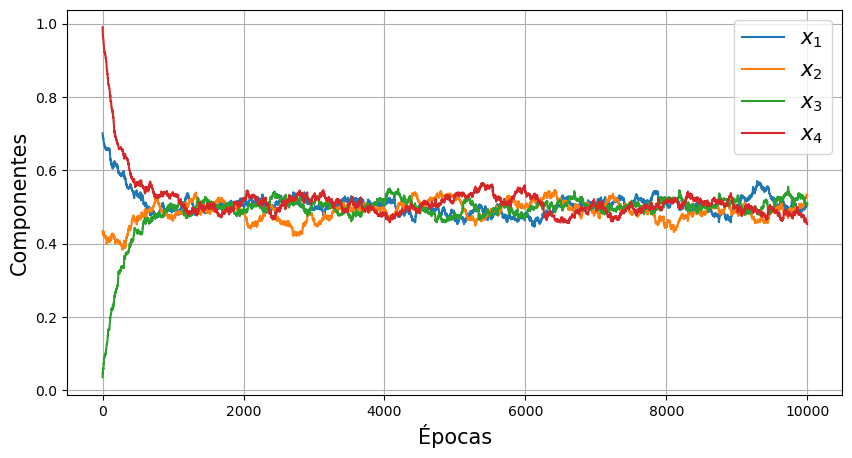

In [135]:
plt.figure(figsize=(10,5))
plt.plot(x_1, label=r'$x_1$')
plt.plot(x_2, label=r'$x_2$')
plt.plot(x_3, label=r'$x_3$')
plt.plot(x_4, label=r'$x_4$')
plt.legend(fontsize=15)
plt.xlabel('Épocas', fontsize=15)
plt.ylabel('Componentes', fontsize=15)
plt.grid()
plt.savefig('ejercicio_1.png', dpi=300, bbox_inches='tight')


# plt.xlim(0,10)
sys = np.linalg.eig(sigma)
print('Eigenvalues', sys[0])
print('Eigenvectors', sys[1].T)

lim = 2000
med_x1 = np.mean(x_1[lim:])
med_x2 = np.mean(x_2[lim:])
med_x3 = np.mean(x_3[lim:])
med_x4 = np.mean(x_4[lim:])
print('Media', med_x1, med_x2, med_x3, med_x4)

#   2.

In [215]:
# Red Neuronal Kohonen con 2 entradas 10 salidas


def neighborhood_function(i, j, sigma):
    return np.exp(-(i-j)**2 / (2*sigma**2))

def learn_kohonen(W, sigma, lr = 0.1):
    r = np.random.uniform(0.9, 1.1)
    
    # theta = np.random.uniform(0, np.pi)
    # x = r * np.array([np.cos(theta), np.sin(theta)])

    while(1):
        x = np.random.uniform(-1.1, 1.1)
        y = np.random.uniform(0, 1.1)
        cond_r = np.sqrt(x**2 + y**2) < 1.1 and np.sqrt(x**2 + y**2) > 0.9
        if cond_r: break
    
    x = np.array([x, y])
    #calculo el winner
    dist = np.linalg.norm(W - x, axis = 1)
    winner = np.argmin(dist) # indice del minimo

    # actualizo los pesos
    for i in range(10):
        W[i] += lr * neighborhood_function(i, winner, sigma) * (x - W[i])
    
    return W





In [216]:
def kohonen(sigma):
    
    W = np.random.rand(10, 2) * 2 - 1
    # print("inicio :" , W)
    W_0 = W.copy()

    for i in range(500000):
        W = learn_kohonen(W, sigma)
    # print("final :" , W)
    return W, W_0


def plot_kohonen(W, W_0, sigma):
    plt.figure(figsize=(5,5))
    #semicirculo
    r_min, r_max = 0.9, 1.1
    theta_min, theta_max = 0, np.pi
    r = np.linspace(r_min, r_max, 100)
    theta = np.linspace(theta_min, theta_max, 100)
    R, Theta = np.meshgrid(r, theta)
    X = R * np.cos(Theta)
    Y = R * np.sin(Theta)
    plt.figure(figsize=(6, 6))
    plt.contourf(X, Y, np.ones_like(X), cmap="Blues", alpha=0.8)
    plt.axis("equal")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)

    colors = ["r", "g", "b", "c", "m", "y", "k", "orange", "purple", "brown"]
    for i in range(10):
        plt.plot(W_0[i, 0], W_0[i, 1], marker="o", markersize=10, color=colors[i])
        plt.plot(W[i, 0], W[i, 1], marker=">", markersize=10, color=colors[i])
        #poner el numero en los puntos finales
        # plt.text(W[i, 0]-0.05, W[i, 1] + 0.08, str(i), fontsize=15, color="black")
    
    # plt.plot(0, 0.63, marker="x", markersize=20, color="r", alpha=1, label="Centroide")
    # plt.scatter(0, 0.63, color="r", s=300, marker="s", label="Centroide", alpha=0.5)

    # plt.legend(fontsize=15, loc="lower left")
    plt.title(r"$\sigma = $" + str(sigma))
    plt.savefig('ejercicio_2_'+str(sigma)+'.png', dpi=300, bbox_inches='tight')


<Figure size 500x500 with 0 Axes>

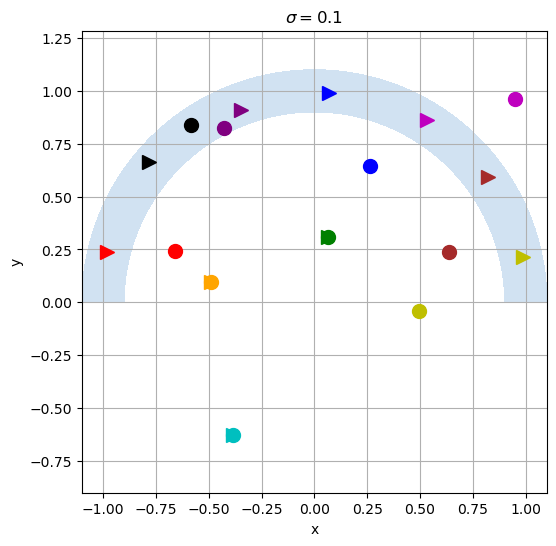

<Figure size 500x500 with 0 Axes>

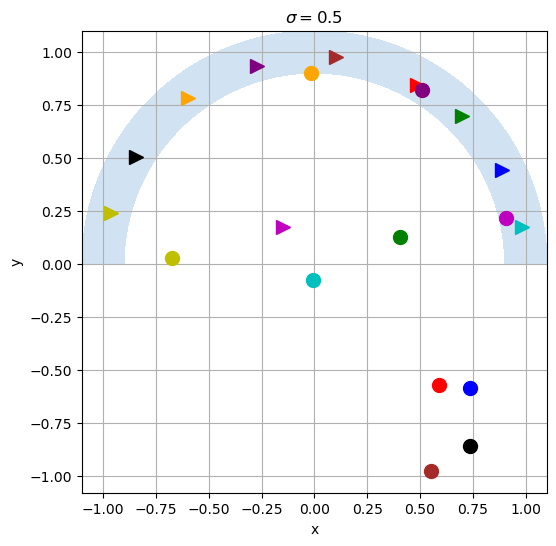

<Figure size 500x500 with 0 Axes>

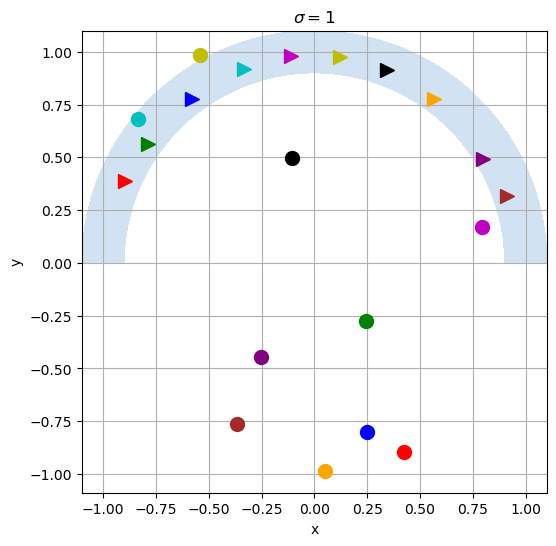

<Figure size 500x500 with 0 Axes>

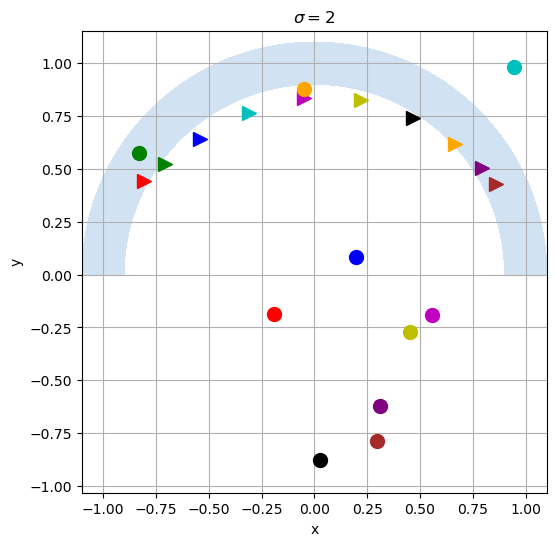

<Figure size 500x500 with 0 Axes>

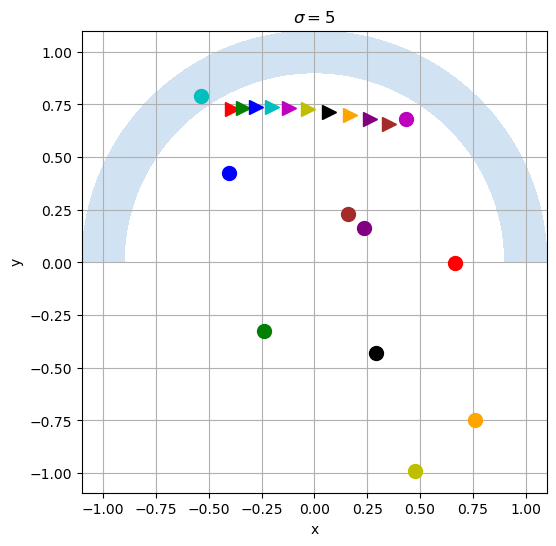

<Figure size 500x500 with 0 Axes>

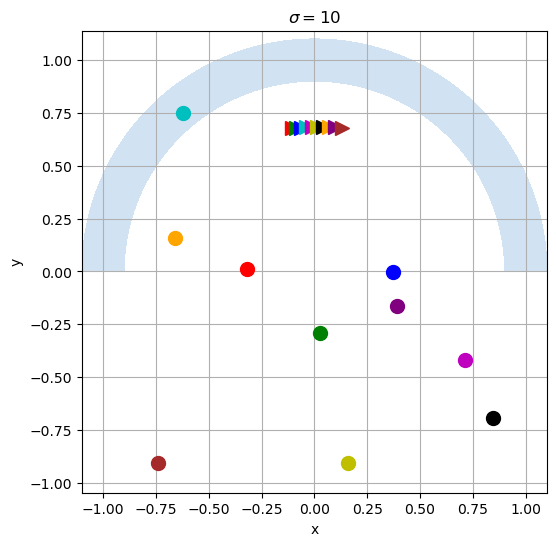

<Figure size 500x500 with 0 Axes>

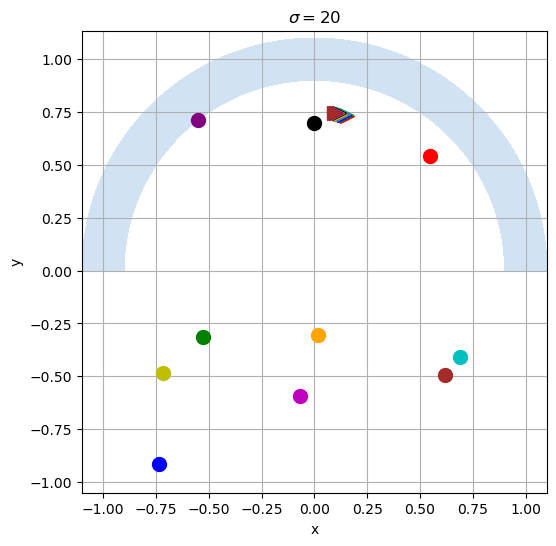

In [217]:
W = []
W_0 = []
sigma = [0.1, 0.5, 1, 2, 5, 10, 20]
for i in sigma:
    W_aux, W_0_aux = kohonen(i)
    W.append(W_aux)
    W_0.append(W_0_aux)

for i in range(len(sigma)):
    plot_kohonen(W[i], W_0[i], sigma[i])
